# Recovering underlying curve from contaminated discrete observations using AdaFNN

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from adafnn import MyAdaFNN
from train import train_pipeline

# Data Generation

In [2]:
my_data = torch.load("data/mydata/original_data.pt")
my_data_noise = torch.load("data/mydata/noise_data.pt")

matern = torch.load("data/matern/data.pt")

adafnn_data = torch.load("data/adafnn/original_data.pt")
adafnn_data_noise = torch.load("data/adafnn/noise_data.pt")

In [4]:
tseq = torch.linspace(0,1,101)

## My Data

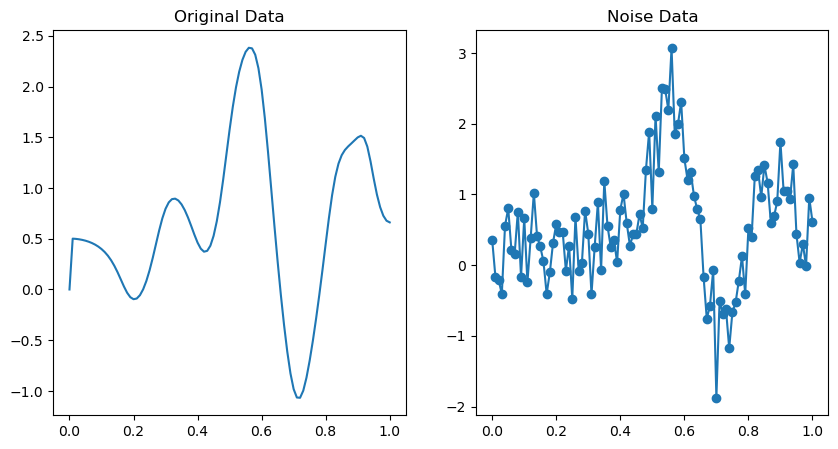

In [93]:
# visualize the first data
fig, ax = plt.subplots(1,2, figsize=(10,5))
ax[0].plot(tseq, my_data[0])
ax[0].set_title("Original Data")
ax[1].plot(tseq, my_data_noise[0], 'o-')
ax[1].set_title("Noise Data")
plt.show();

## Matern Data

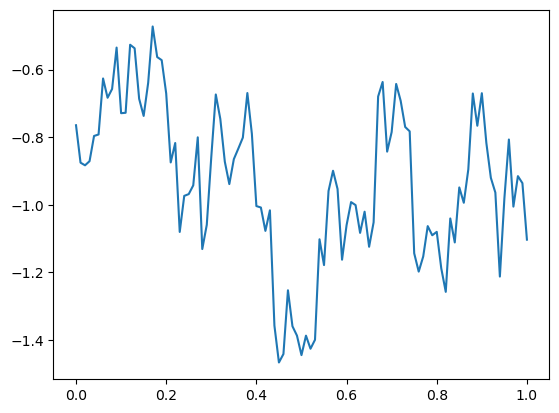

In [94]:
plt.plot(tseq, matern[0])
plt.show();

## AdaFNN Data

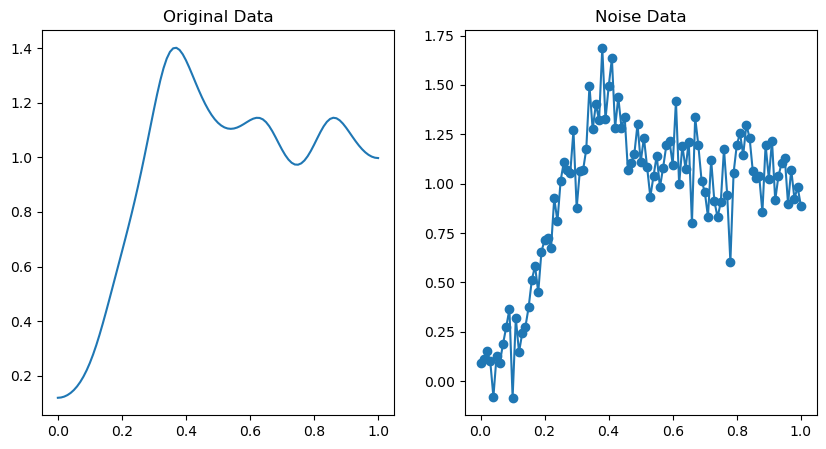

In [95]:
# visualize the first data
fig, ax = plt.subplots(1,2, figsize=(10,5))
ax[0].plot(tseq, adafnn_data[0])
ax[0].set_title("Original Data")
ax[1].plot(tseq, adafnn_data_noise[0], 'o-')
ax[1].set_title("Noise Data")
plt.show();

# Train

In [125]:
config = dict(
    epochs = 200,
    batch_size = 128,
    # lr = 3e-4,
    lr = 5e-4,
    device = "cuda" if torch.cuda.is_available() else "cpu",
    gamma = 0.5,
    step_size = 30,
    # x_data_path="data/matern/data.pt",
    # y_data_path="data/matern/data.pt",
    x_data_path="data/mydata/noise_data.pt",
    y_data_path="data/mydata/original_data.pt",
    model_params = dict(
        n_base = 7,
        base_hidden = [256, 256, 256, 256],
        # base_hidden = [128, 128, 128, 128],
        tseq = torch.linspace(0, 1, 101),
        dropout = 0.1,
        lambda1 = 0,
        lambda2 = 0,
        device = "cuda" if torch.cuda.is_available() else "cpu"
    )
)

In [126]:
torch.manual_seed(123)

model = MyAdaFNN(**config["model_params"])

train_pipeline(model, config)

Adjusting learning rate of group 0 to 5.0000e-04.

Epoch: [1 / 200]
------------------------------
Training loss: 1.149173 [1280/7000]
Training loss: 0.937732 [2560/7000]
Training loss: 0.932384 [3840/7000]
Training loss: 0.844315 [5120/7000]
Training loss: 0.879472 [6400/7000]
Train error:
 Avg loss: 1.026887 

Validation/Test error:
 Avg loss: 2.694611 

Adjusting learning rate of group 0 to 5.0000e-04.

Epoch: [2 / 200]
------------------------------
Training loss: 0.766172 [1280/7000]
Training loss: 0.810998 [2560/7000]
Training loss: 0.783985 [3840/7000]
Training loss: 0.779374 [5120/7000]
Training loss: 0.841649 [6400/7000]
Train error:
 Avg loss: 0.804823 

Validation/Test error:
 Avg loss: 2.035430 

Adjusting learning rate of group 0 to 5.0000e-04.

Epoch: [3 / 200]
------------------------------
Training loss: 0.774762 [1280/7000]
Training loss: 0.772725 [2560/7000]
Training loss: 0.799158 [3840/7000]
Training loss: 0.839932 [5120/7000]
Training loss: 1.384363 [6400/7000]
Tra

train_loss,██▇▇▆▇▅▅▅▅▄▃▃▃▃▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
val_loss,█▇▇▄▅▄▄▃▄▃▃▂▂▂▂▂▁▂▁▁▁▁▁▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
train_loss,0.51274
val_loss,0.5399


In [127]:
x_data = torch.load(config["x_data_path"])
y_data = torch.load(config["y_data_path"])
y_data = torch.load("data/mydata/original_data.pt")
tseq = torch.linspace(0,1,101)

with torch.no_grad():
    pred = model(x_data[:100,])

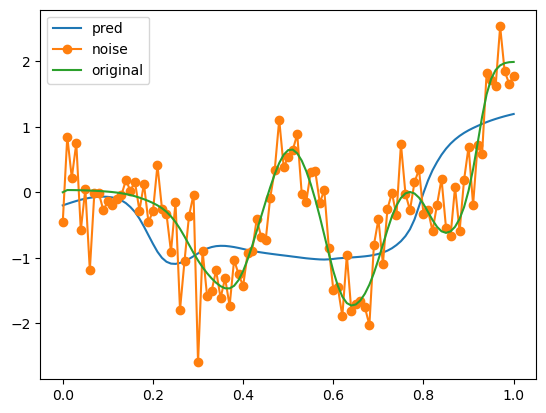

In [128]:
i = 10
plt.plot(tseq, pred[i].detach(), label="pred")
plt.plot(tseq, x_data[i], "o-", label="noise")
plt.plot(tseq, y_data[i], label="original")
plt.legend()
plt.show();

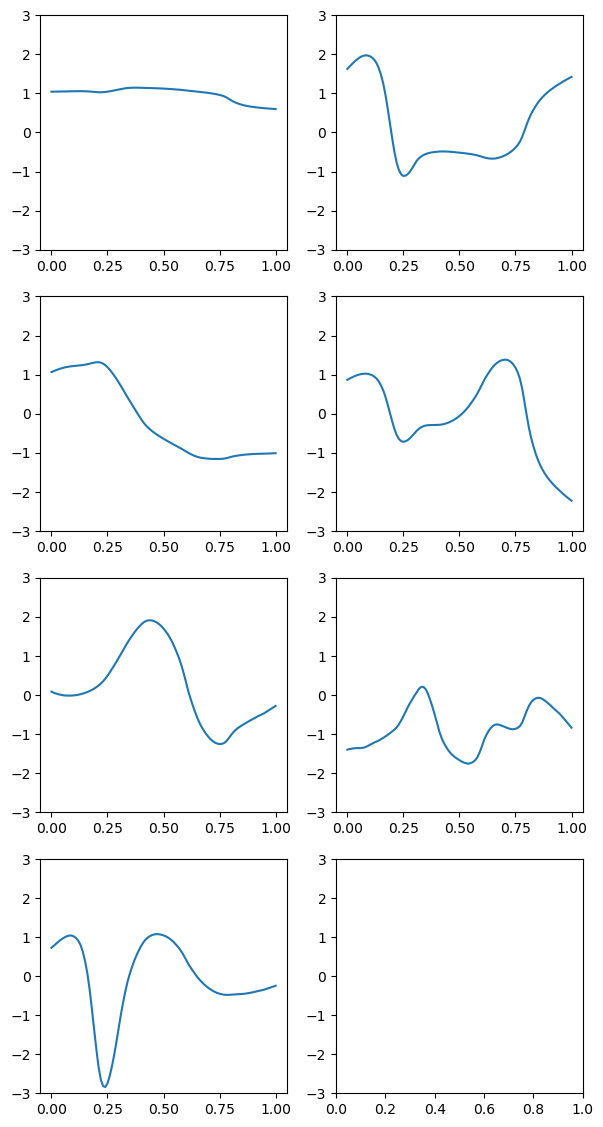

In [129]:
model.plot_bases()

In [130]:
model.check_orthonormality()

Inner Product between basis 1 and basis 2: 0.07899944484233856
Inner Product between basis 1 and basis 3: -0.0892571210861206
Inner Product between basis 1 and basis 4: 0.09290535748004913
Inner Product between basis 1 and basis 5: 0.30919334292411804
Inner Product between basis 1 and basis 6: -0.868762731552124
Inner Product between basis 1 and basis 7: -0.03392338752746582
Inner Product between basis 2 and basis 3: 0.22259390354156494
Inner Product between basis 2 and basis 4: -0.10228173434734344
Inner Product between basis 2 and basis 5: -0.31746894121170044
Inner Product between basis 2 and basis 6: -0.18789106607437134
Inner Product between basis 2 and basis 7: 0.3088238537311554
Inner Product between basis 3 and basis 4: 0.1656138300895691
Inner Product between basis 3 and basis 5: 0.26083019375801086
Inner Product between basis 3 and basis 6: 0.09268754720687866
Inner Product between basis 3 and basis 7: -0.15106216073036194
Inner Product between basis 4 and basis 5: -0.1104136

# Bspline

In [25]:
my_data = torch.load("data/mydata/original_data.pt").numpy()
my_data_noise = torch.load("data/mydata/noise_data.pt").numpy()

matern = torch.load("data/matern/data.pt").numpy()

adafnn_data = torch.load("data/adafnn/original_data.pt").numpy()
adafnn_data_noise = torch.load("data/adafnn/noise_data.pt").numpy()

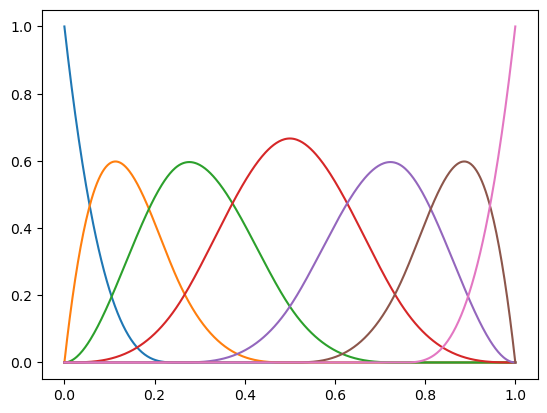

In [26]:
from skfda.representation.grid import FDataGrid
from skfda.representation.basis import BSplineBasis

basis = BSplineBasis(n_basis=7)
basis.plot()
plt.show();

In [27]:
tseq = np.linspace(0,1,101)
fd = FDataGrid(data_matrix=my_data_noise, grid_points=tseq)
fd_b = fd.to_basis(basis)

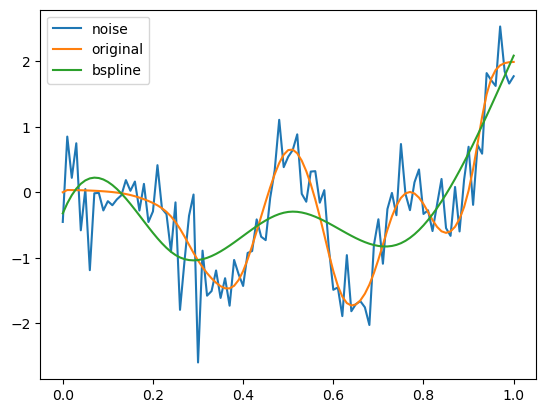

In [29]:
ind = 10
plt.plot(tseq, my_data_noise[ind], label="noise")
plt.plot(tseq, my_data[ind], label="original")
plt.plot(tseq, fd_b(tseq)[ind], label="bspline")
plt.legend()
plt.show();

# FPCA

In [6]:
from skfda.preprocessing.dim_reduction import FPCA
from skfda.representation.grid import FDataGrid

In [57]:
tseq = np.linspace(0,1,101)
fd = FDataGrid(data_matrix=my_data_noise, grid_points=tseq)

fpca = FPCA(n_components=7)
fpca_scores = fpca.fit_transform(fd)

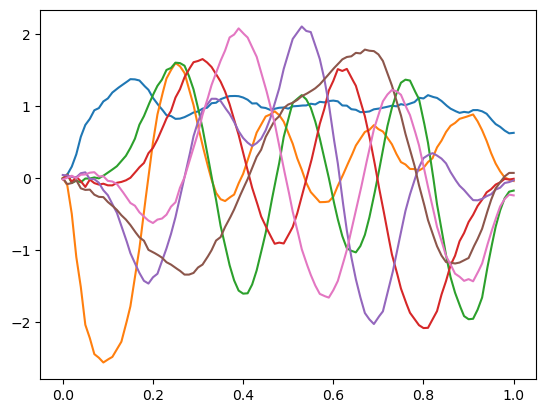

In [18]:
fpca.components_.plot();

In [38]:
fpca.singular_values_

array([39.27356583, 30.93144096, 29.21560742, 28.89627383, 28.74414552,
       28.620781  , 28.46441331])

In [66]:
y_pred_fpca = np.matmul(fpca_scores,fpca.components_(tseq).squeeze())

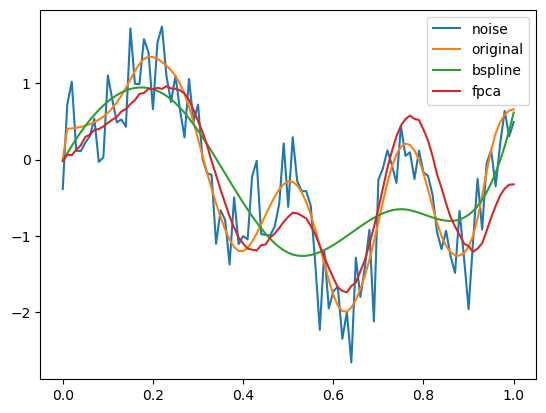

In [70]:
ind = 2
plt.plot(tseq, my_data_noise[ind], label="noise")
plt.plot(tseq, my_data[ind], label="original")
plt.plot(tseq, fd_b(tseq)[ind], label="bspline")
plt.plot(tseq, y_pred_fpca[ind], label="fpca")
plt.legend()
plt.show();